# Cross-species muscle

Matplotlib Backend: module://ipykernel.pylab.backend_inline
-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0

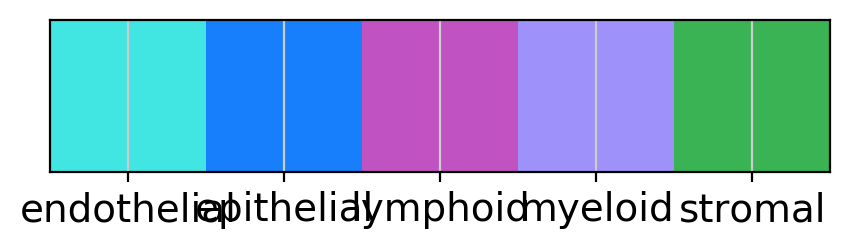

In [1]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import glob
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scanpy as sc
import yaml

sys.path.append(
    "/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/"
)

# Handwritten modules
import preprocess
from plot_utils import save_figures

In [25]:
!hostname

ndnd


## Constants

In [2]:
tissue = "muscle"


umap_plot_kws = dict(color=["species", "compartment_group", "broad_group"], ncols=2)
celltype_col = "narrow_group"
species_col = "species"
compartment_col = "compartment_group"

object_dir = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"

output_file = os.path.join(
    object_dir,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)

min_cells_per_celltype = 20

## Set scanpy savefig options

In [3]:
xspecies_figure_folder = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"

figure_folder = os.path.join(xspecies_figure_folder, tissue, "preprocess")

sc._settings.ScanpyConfig(autosave=True, figdir=figure_folder, autoshow=True)
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams["font.family"] = "Arial"

sc.settings.autosave = True
sc.settings.autoshow = True
sc.settings.figdir = figure_folder

# Load data

## Unprocessed data

In [4]:
object_dir = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
h5ad = os.path.join(
    object_dir,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__june2021.h5ad",
)
adata = sc.read(h5ad, cache=True)
adata

AnnData object with n_obs × n_vars = 35263 × 13302
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'cell_id_v1', 'cell_id_v2', 'species_batch'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis'

## Remove color palettes

In [5]:
preprocess.remove_color_palettes(adata)

## Ignore macrophages

Mouse macrophages are a mix of neutrophils and macrophages, so ignore

In [6]:
celltypes_to_ignore = 'macrophage',

In [7]:
adata = adata[~adata.obs.narrow_group.isin(celltypes_to_ignore)]
adata

View of AnnData object with n_obs × n_vars = 33602 × 13302
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'cell_id_v1', 'cell_id_v2', 'species_batch'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis'

### Delete all existing color palettes because they mess plotting up

In [8]:
for key in list(adata.uns.keys()):
    if key.endswith('colors'):
        del adata.uns[key]

In [9]:
adata.uns

{}

In [10]:
preprocess.plot_constants.SPECIES_PALETTE

['#ff7f0e', '#2ca02c', '#1f77b4']

In [11]:
adata.uns['species_colors'] = preprocess.plot_constants.SPECIES_PALETTE

Trying to set attribute `.uns` of view, copying.


... storing 'compartment_broad' as categorical
... storing 'compartment_narrow' as categorical
... storing 'compartment_broad_narrow' as categorical
... storing 'compartment_species' as categorical
... storing 'compartment_narrow_species' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


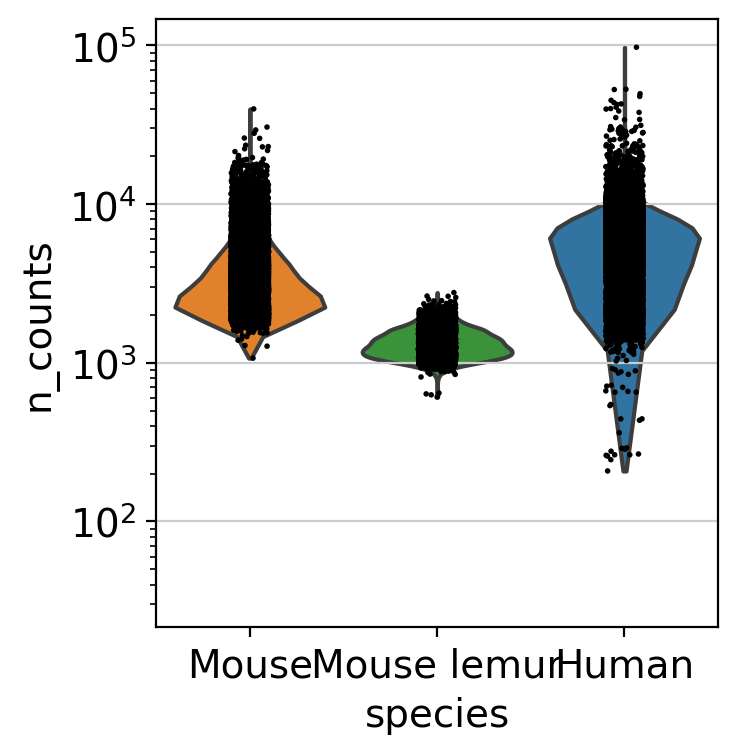

<Figure size 800x800 with 0 Axes>

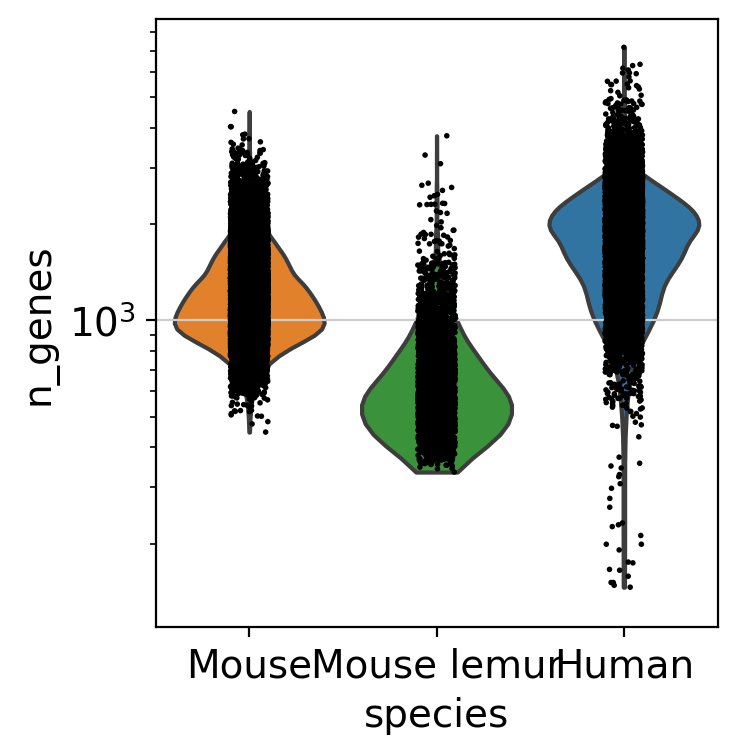

<Figure size 800x800 with 0 Axes>

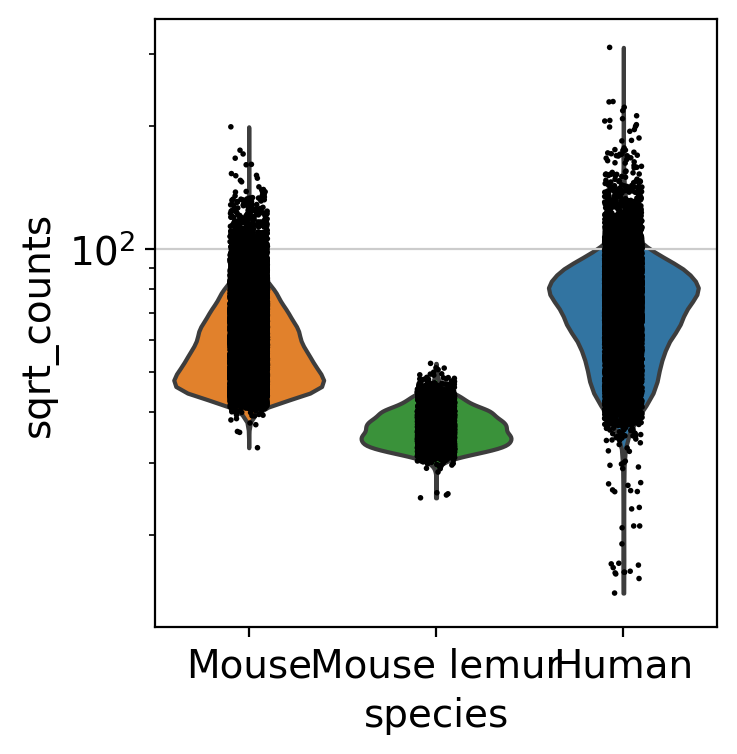

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 800x800 with 0 Axes>

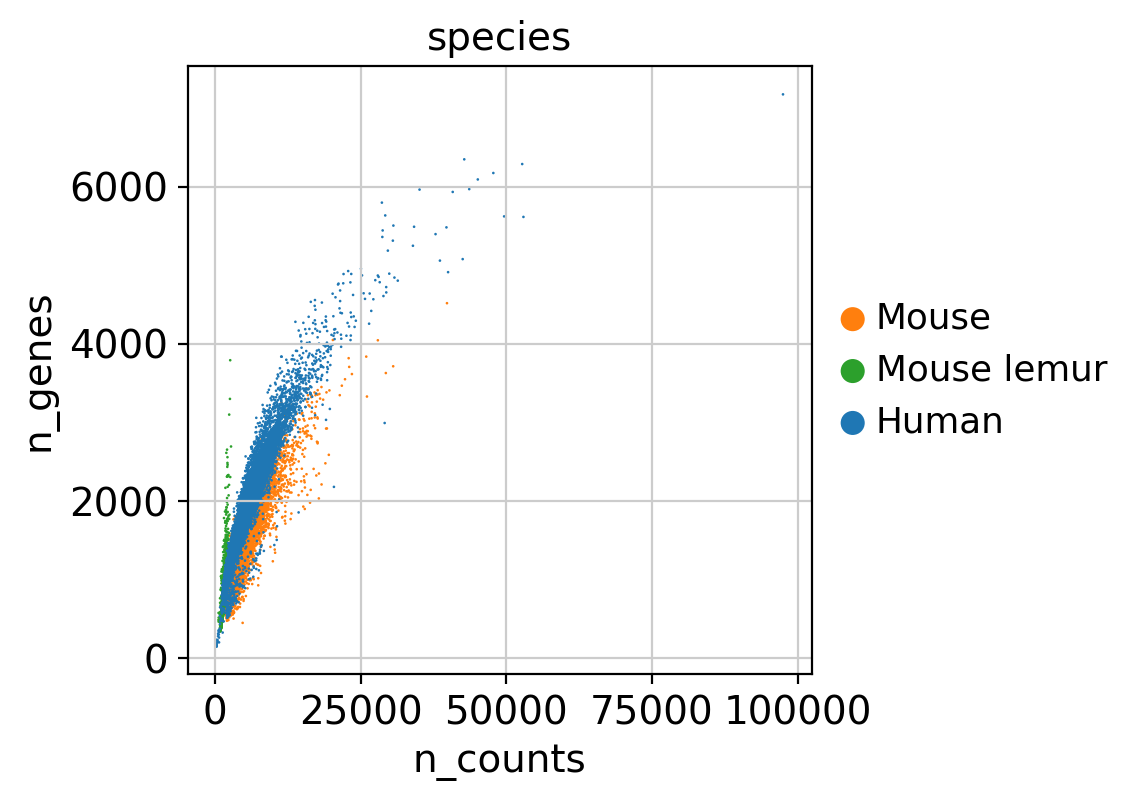

<Figure size 800x800 with 0 Axes>

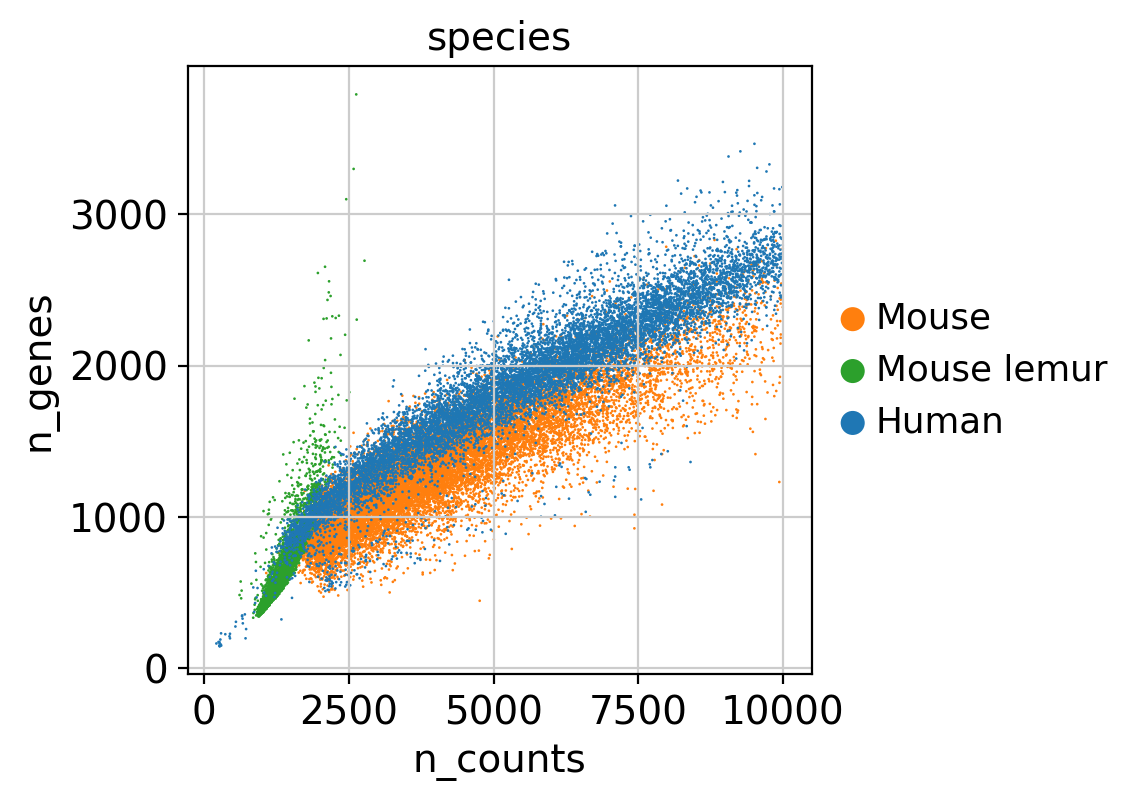

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

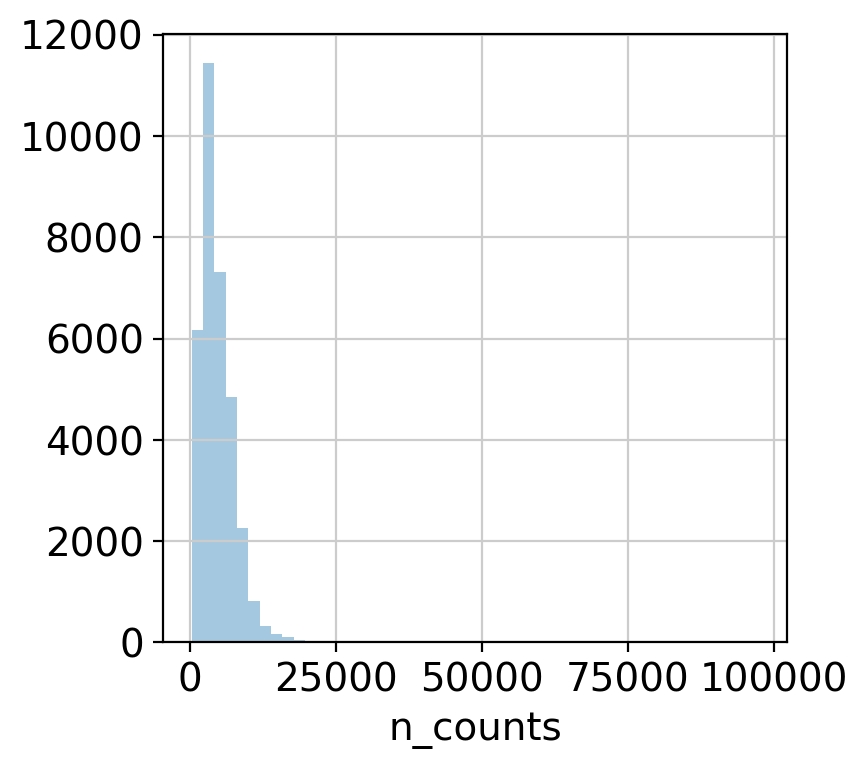

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


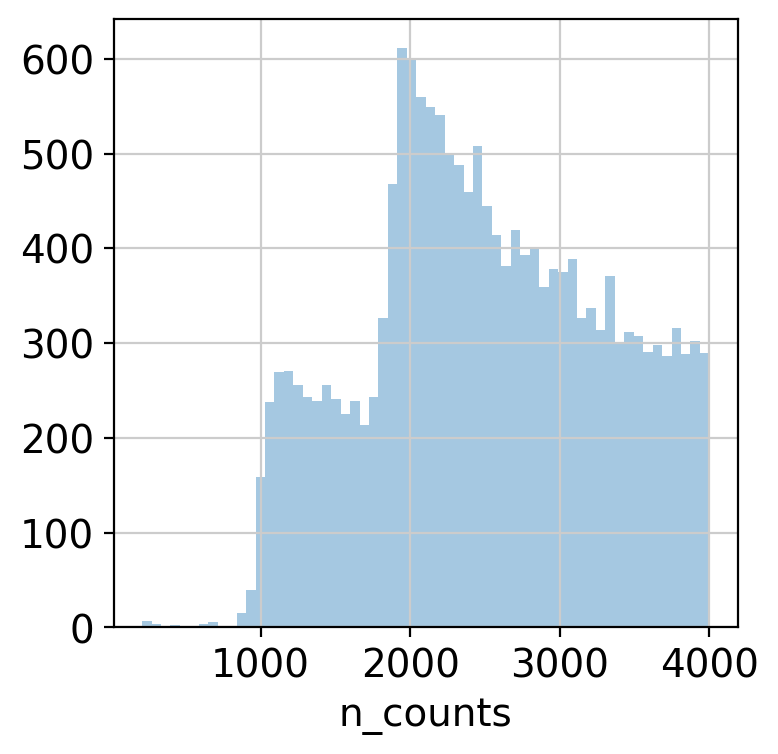

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


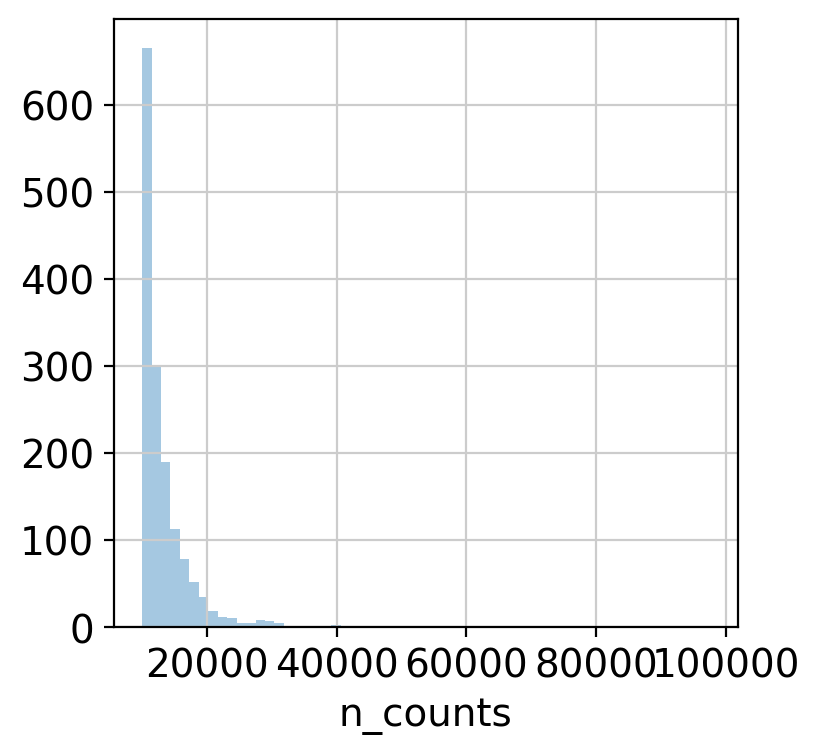

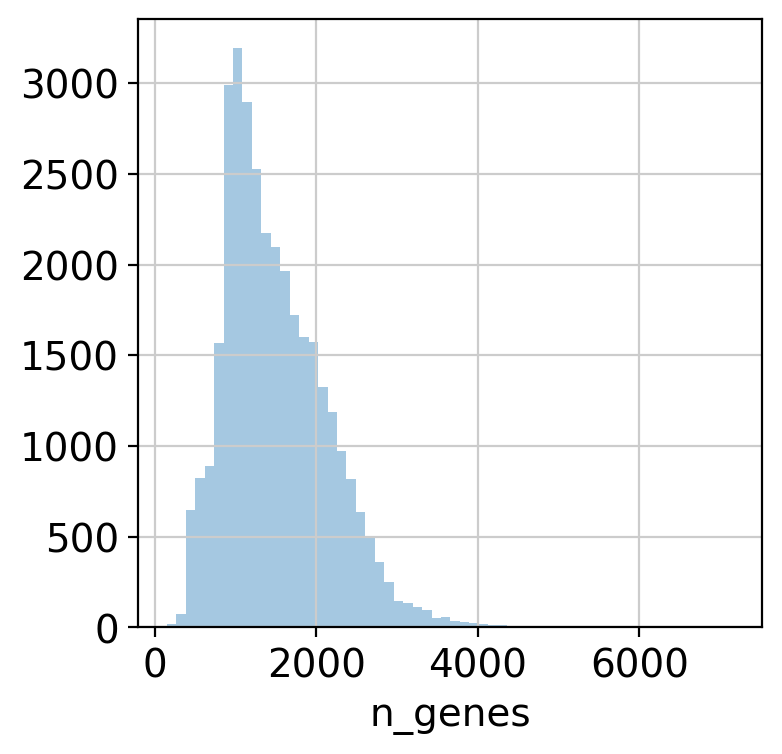

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


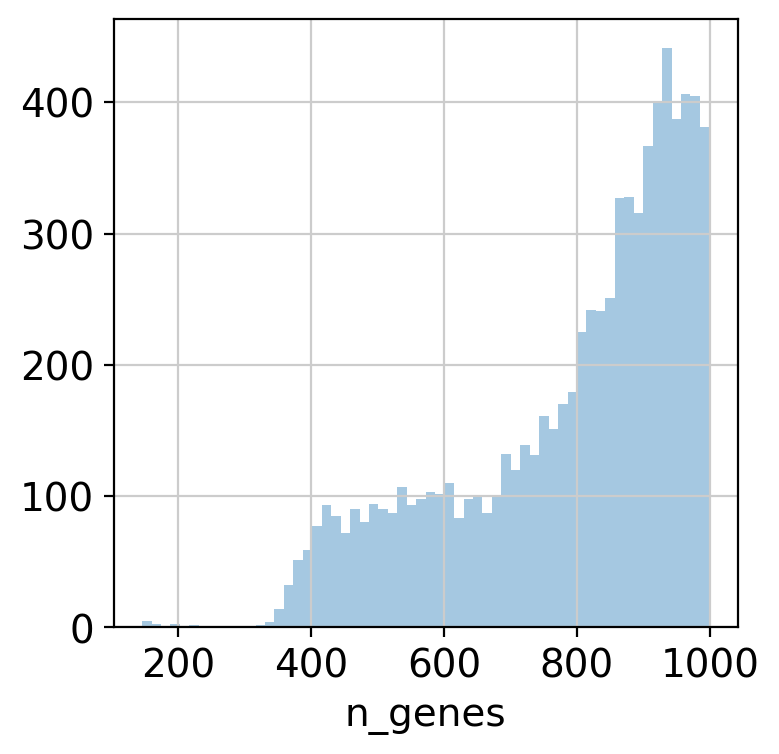

filtered out 155 cells that have less than 1000 counts


Total number of cells: 33602
Number of cells after min count filter: 33447
Number of cells after gene filter: 33447
Total number of genes: 13302


filtered out 423 genes that are detected in less than 3 cells
normalizing counts per cell


Number of genes after cell filter: 12879


    finished (0:00:00)


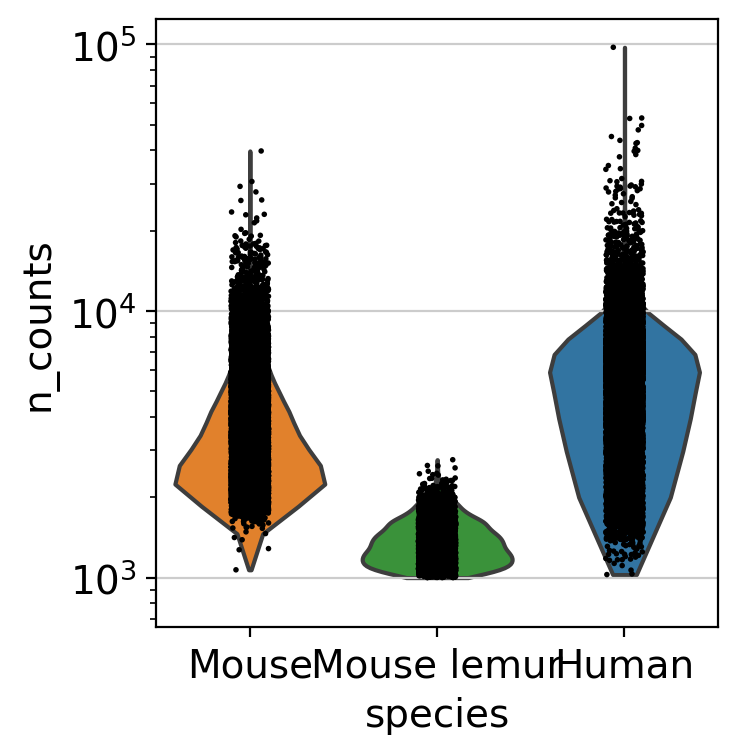

<Figure size 800x800 with 0 Axes>

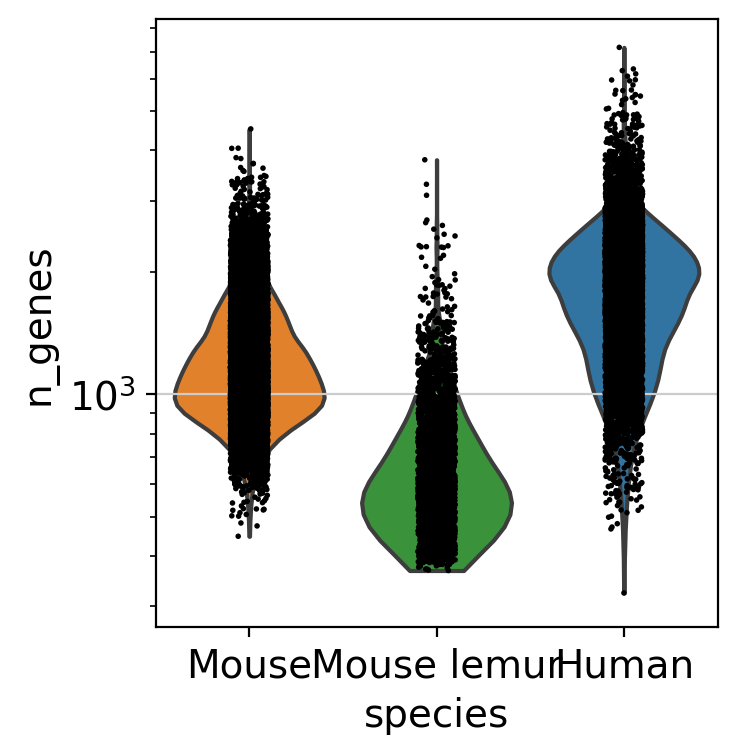

<Figure size 800x800 with 0 Axes>

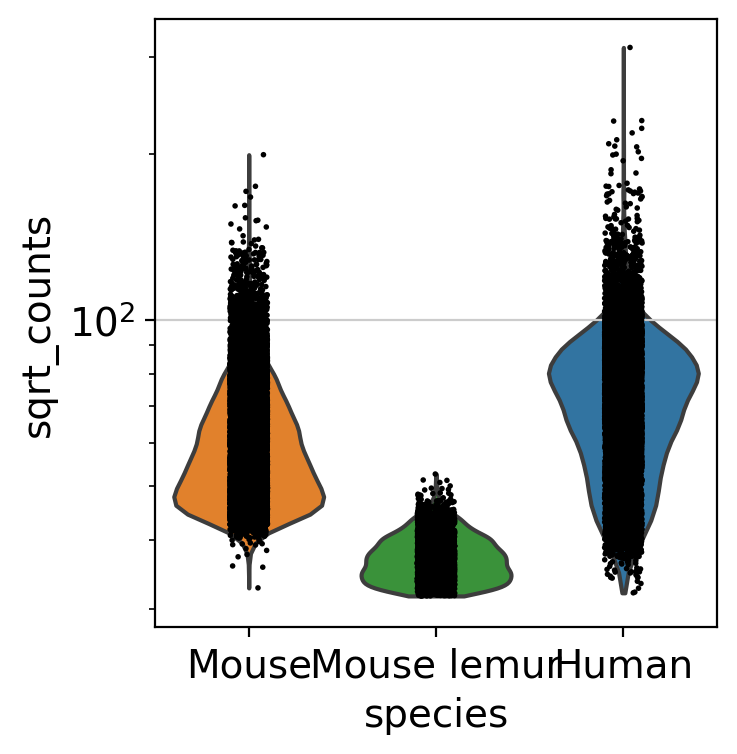

<Figure size 800x800 with 0 Axes>

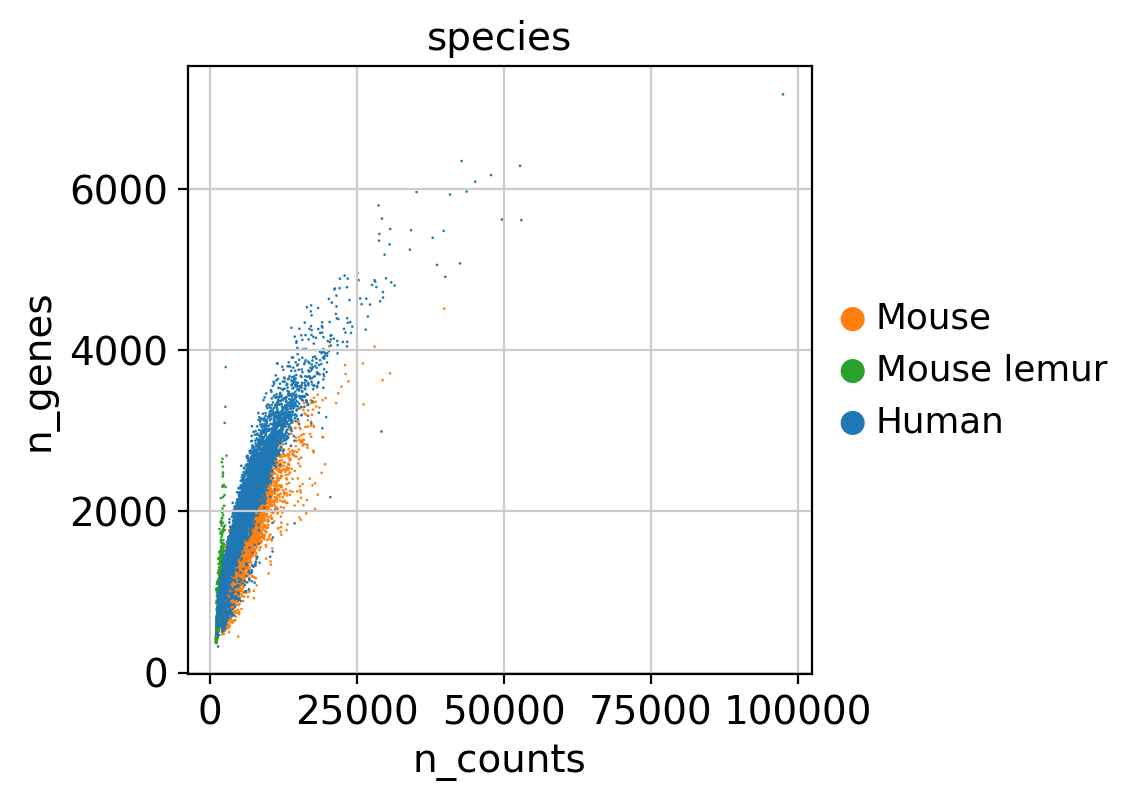

<Figure size 800x800 with 0 Axes>

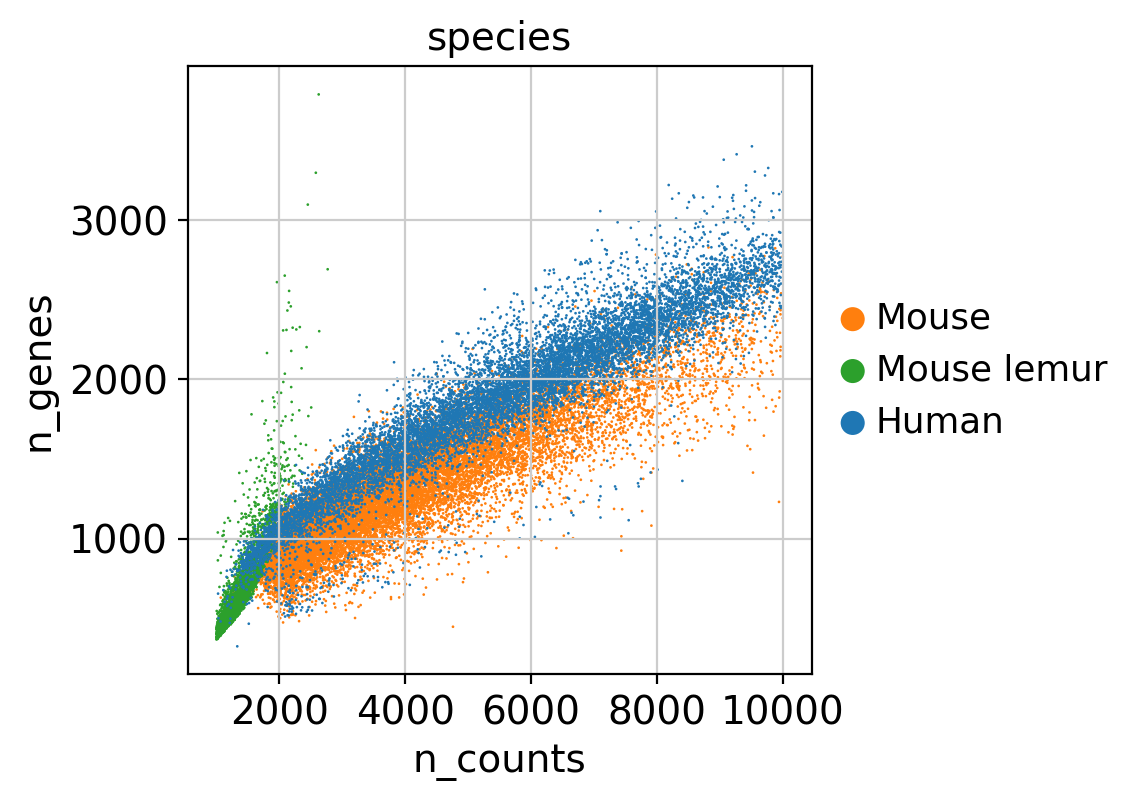

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

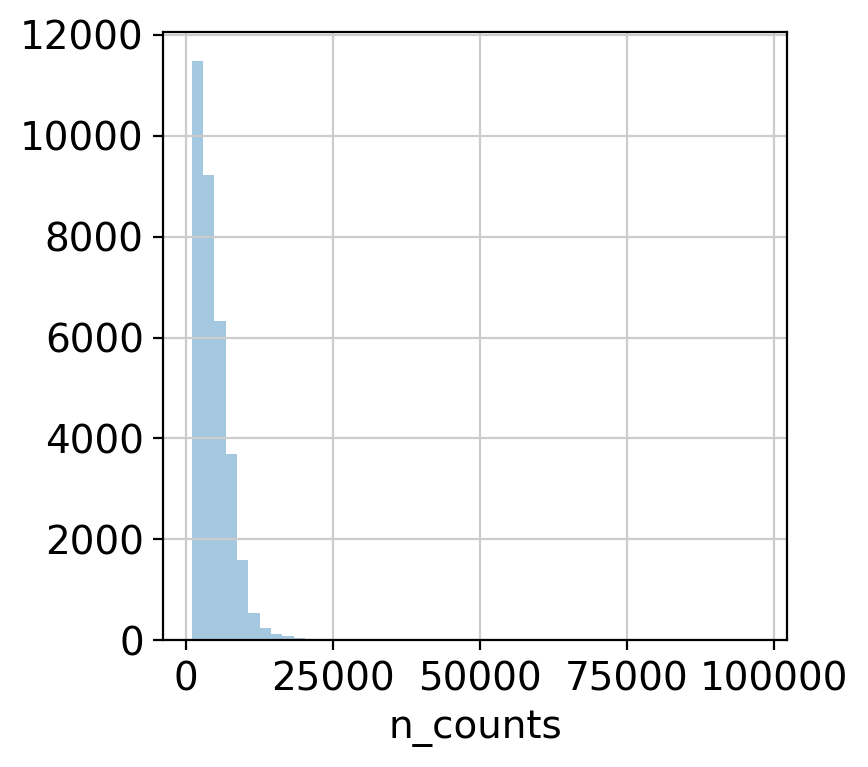

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


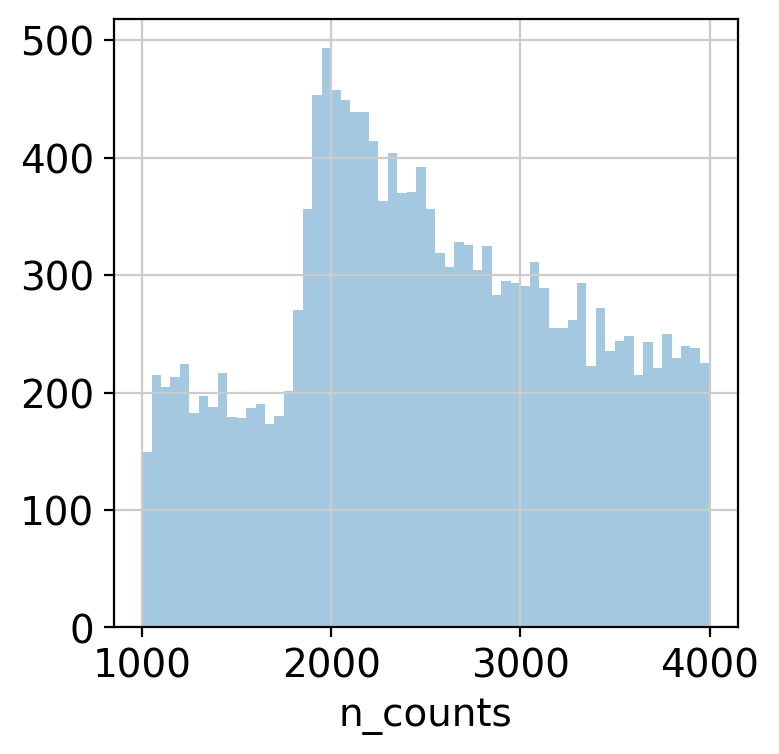

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


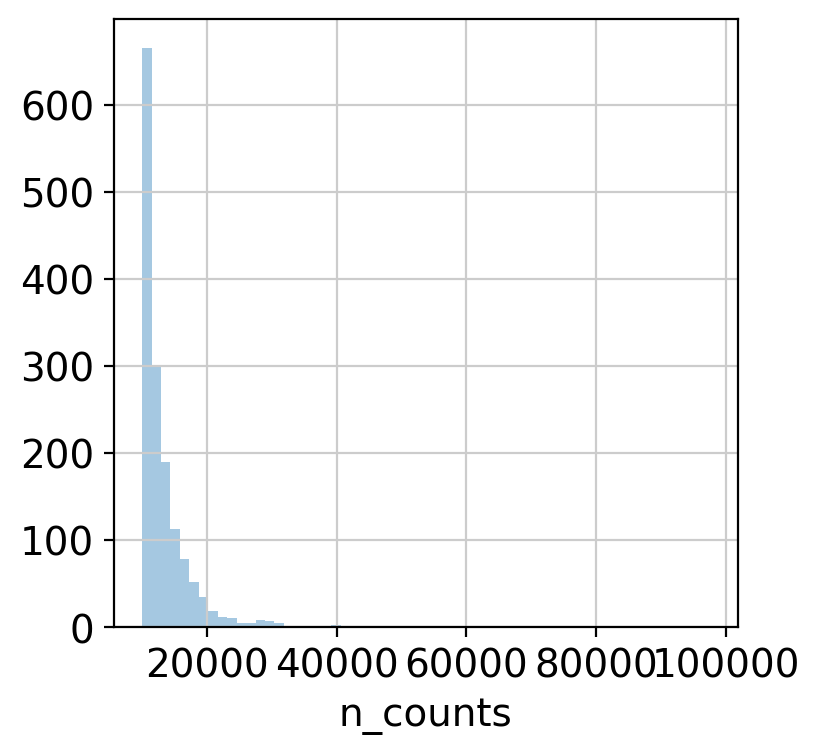

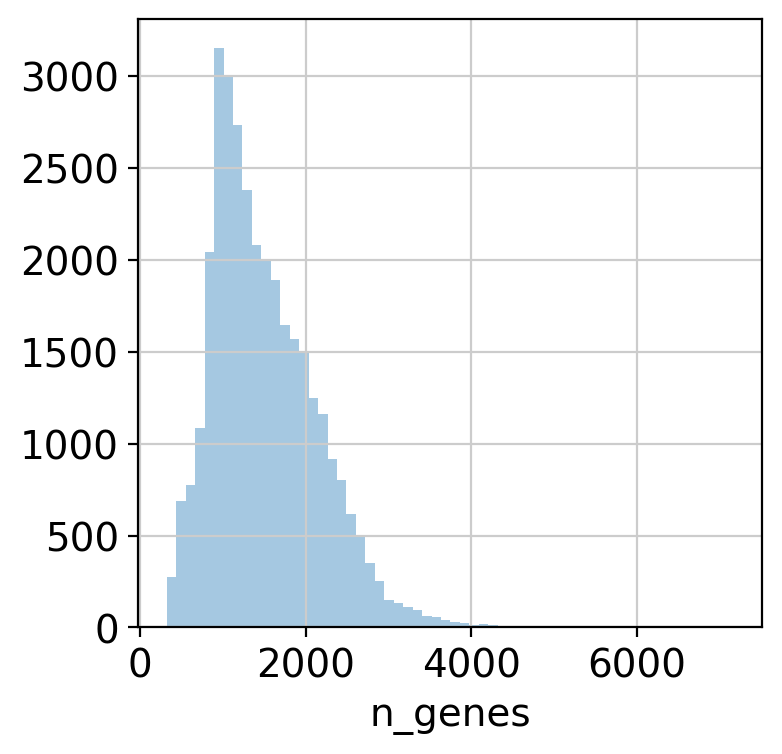

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


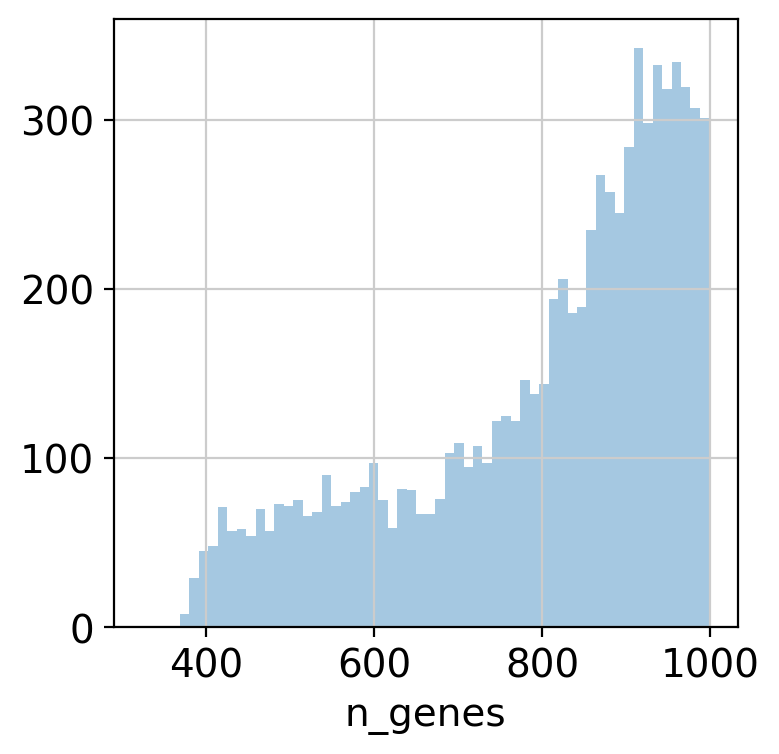

In [12]:
adata = preprocess.add_compartment_combined_cols(adata)
adata = preprocess.filter_genes_cells(adata)


# Filter min cells per group

In [13]:


adata = preprocess.filter_min_cells_per_group(
    adata,
    celltype_col=celltype_col,
    species_col=species_col,
    min_cells_per_celltype=5,
)


Filtering for celltype column narrow_group with at least 5 cells per species
--- Before filtering ---
-- Number of cell types: 61 --
narrow_group                                          species    
B cell                                                Mouse           810
                                                      Mouse lemur     181
                                                      Human             5
B cell (PF)                                           Mouse             6
                                                      Mouse lemur       0
                                                      Human             0
CD4+ T cell                                           Mouse             0
                                                      Mouse lemur     721
                                                      Human             0
CD8+ T cell                                           Mouse             0
                                                      Mouse l

## Plot shared cell tyeps

(12, 4)
--- compartment: lymphoid ---
--- compartment: stromal ---


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a

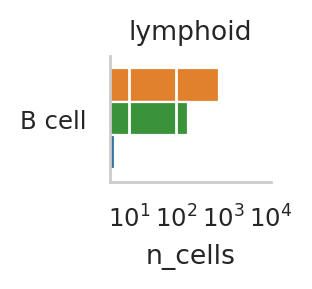

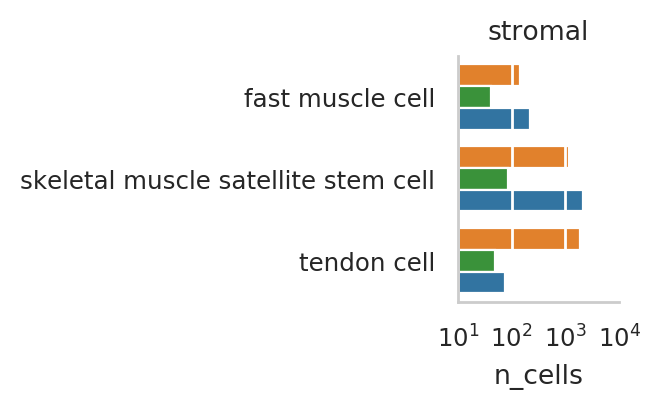

In [14]:
preprocess.plot_shared_cell_types(adata, celltype_col, compartment_col, species_col)
save_figures(os.path.join(figure_folder, 'shared_cell_types'))

# Dimensionality reduction

## Do PCA + k-nearest neighbors pre-batch correction with BBKNN

extracting highly variable genes
    finished (0:00:09)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3273


    finished (0:00:03)


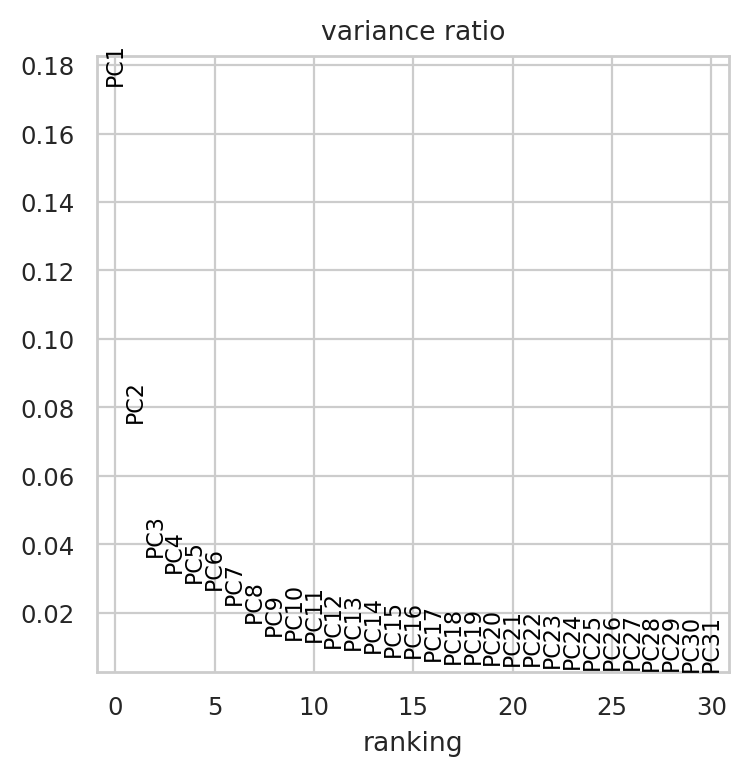

<Figure size 800x800 with 0 Axes>

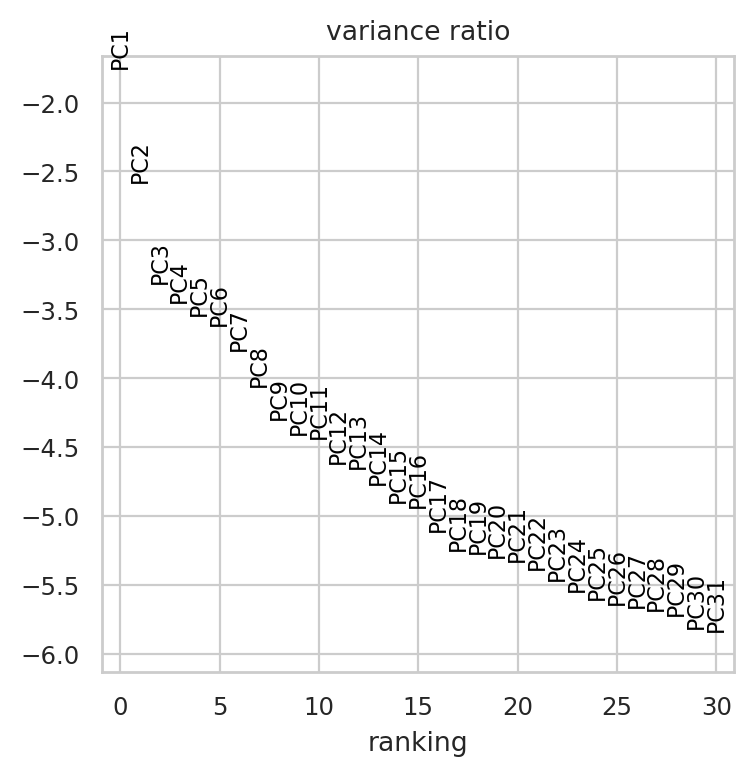

computing PCA
    on highly variable genes
    with n_comps=40
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


<Figure size 800x800 with 0 Axes>

In [15]:
adata = preprocess.dimensionality_reduction(adata)


## Pre-bbknn umaps

Error plotting with colors=['species', 'species_batch', 'age', 'individual'], skipping


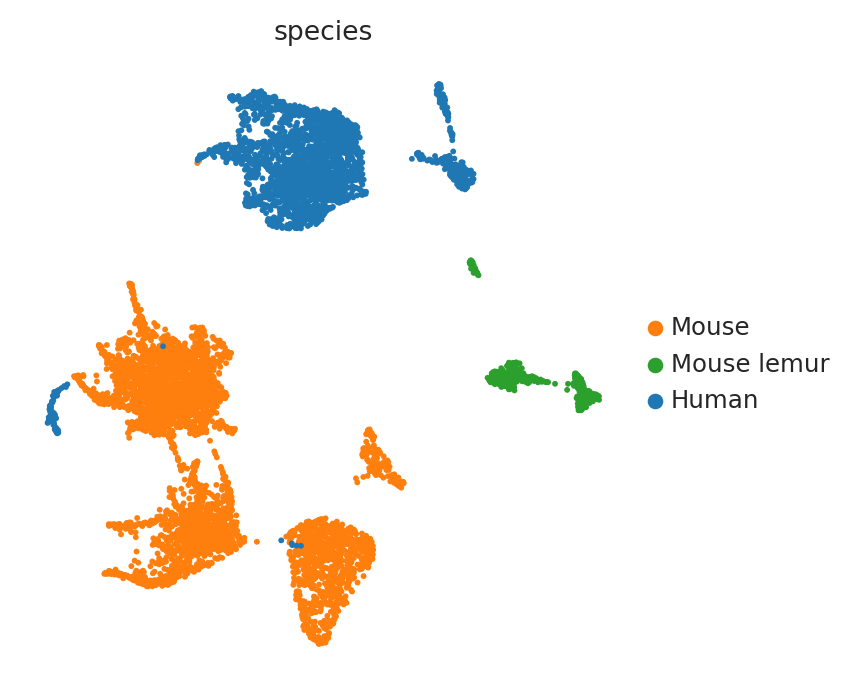

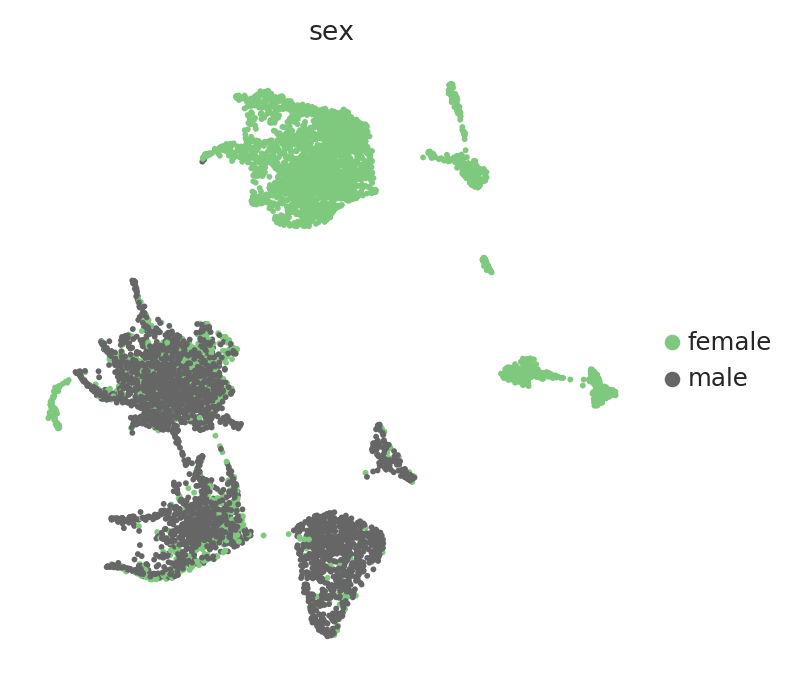

Error plotting with colors=['cell_ontology_class'], skipping


<Figure size 800x800 with 0 Axes>

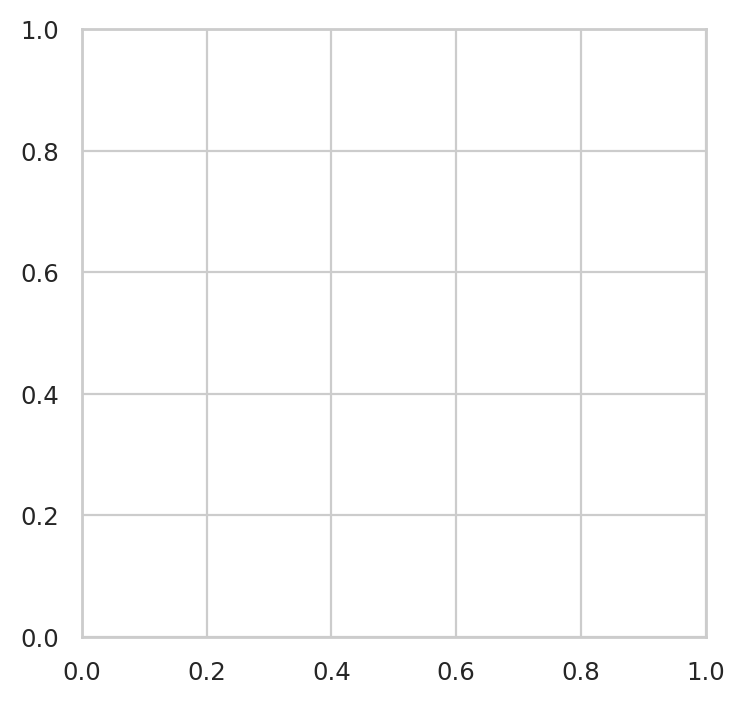

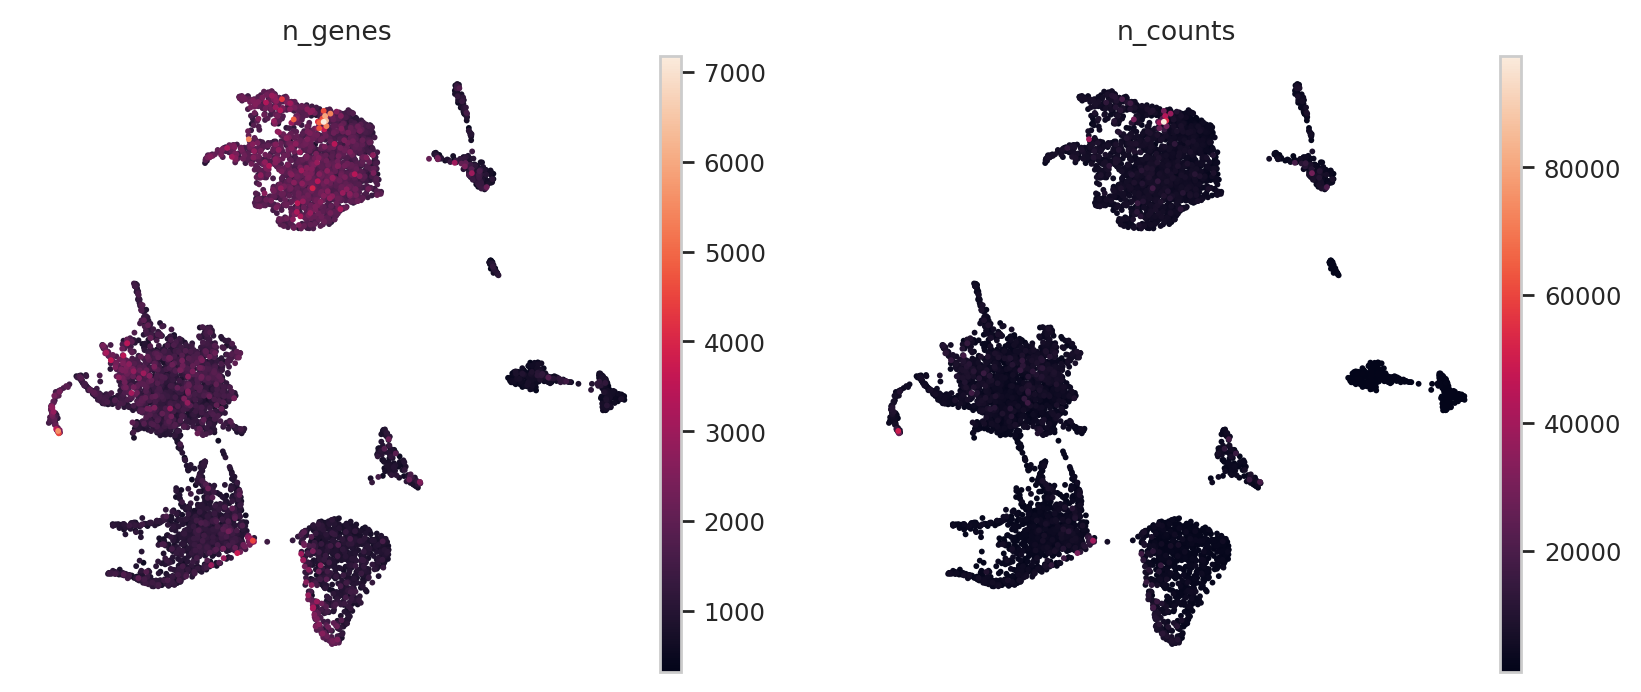

<Figure size 800x800 with 0 Axes>

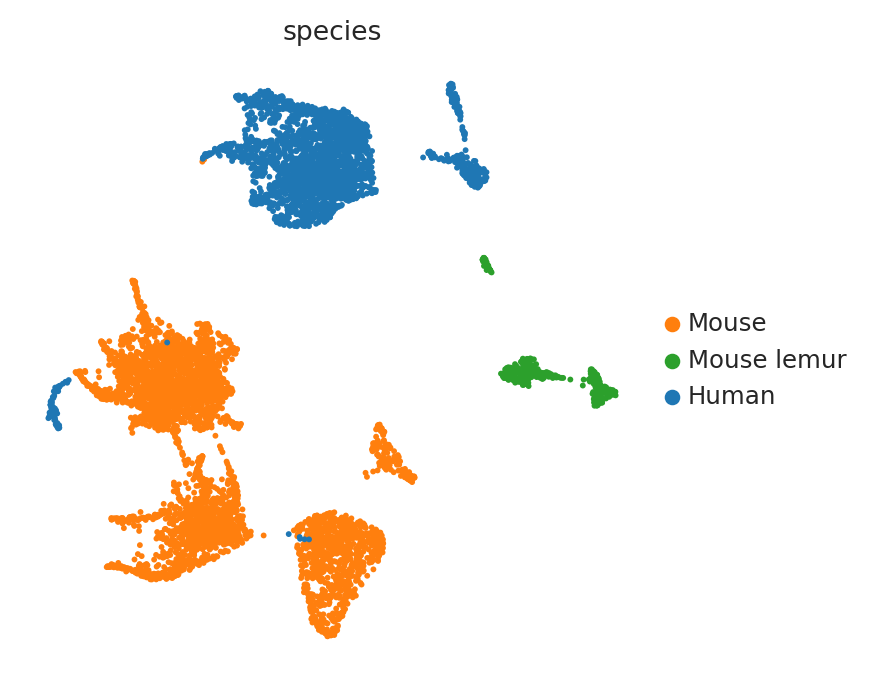

Error plotting with colors=['cell_ontology_class'], skipping
Error plotting with colors=['narrow_group', 'broad_group', 'compartment_group'], skipping
Error plotting with colors=narrow_group, skipping
Error plotting with colors=broad_group, skipping


<Figure size 800x800 with 0 Axes>

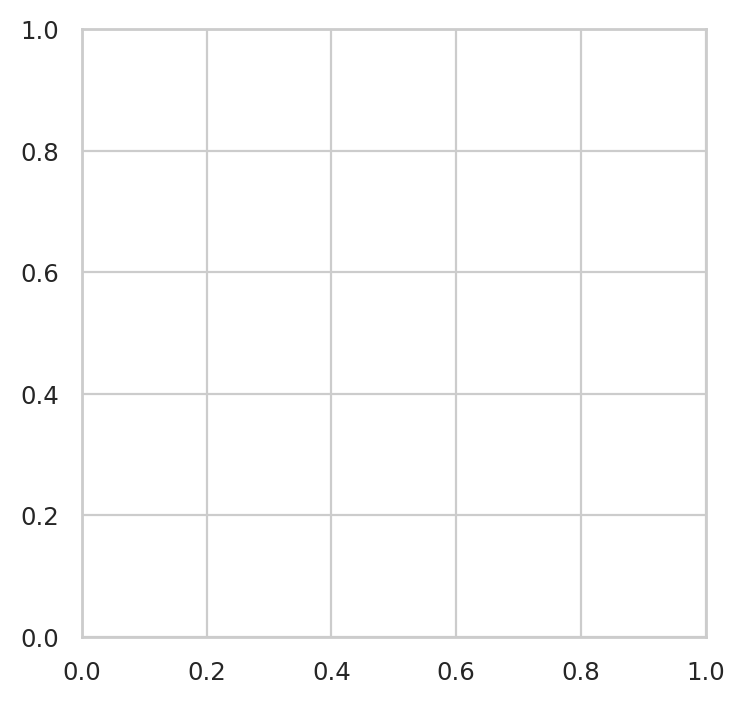

<Figure size 2898x800 with 0 Axes>

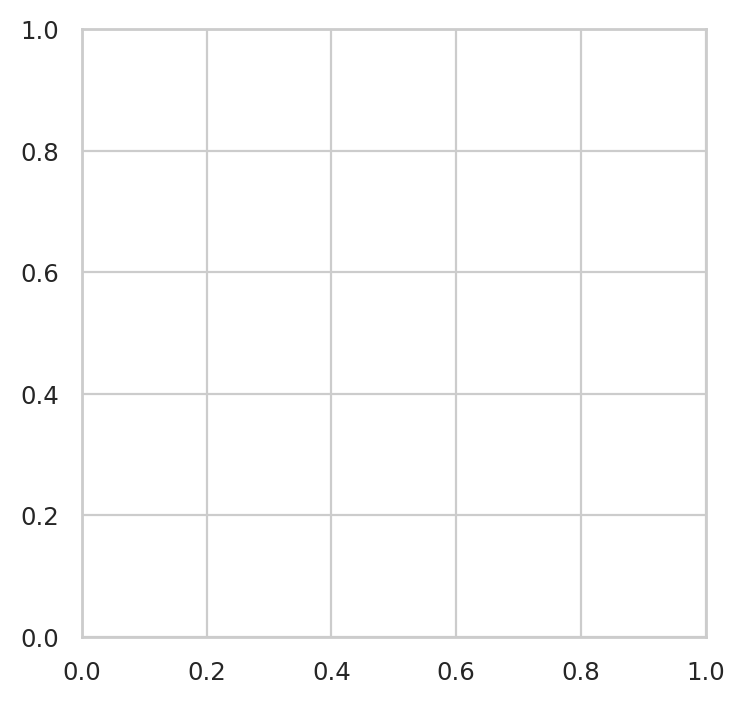

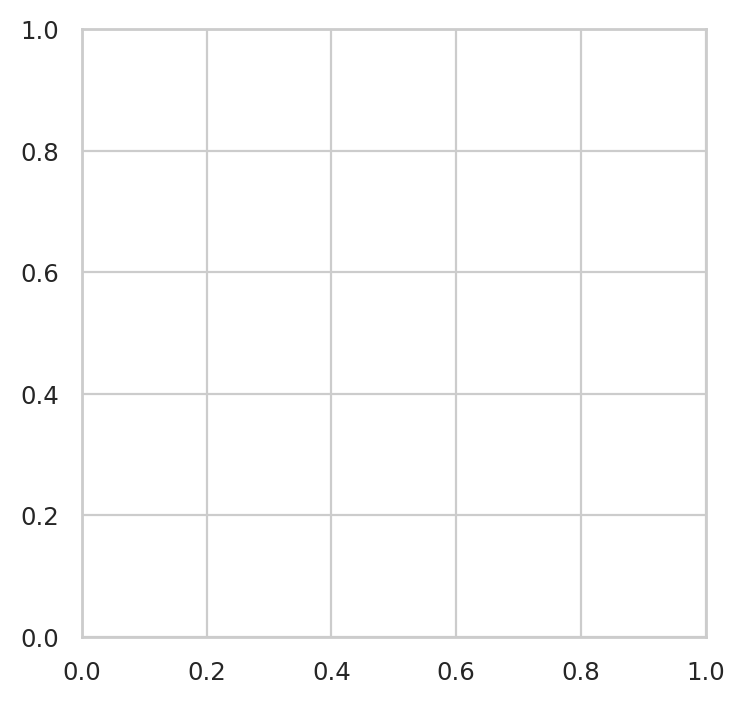

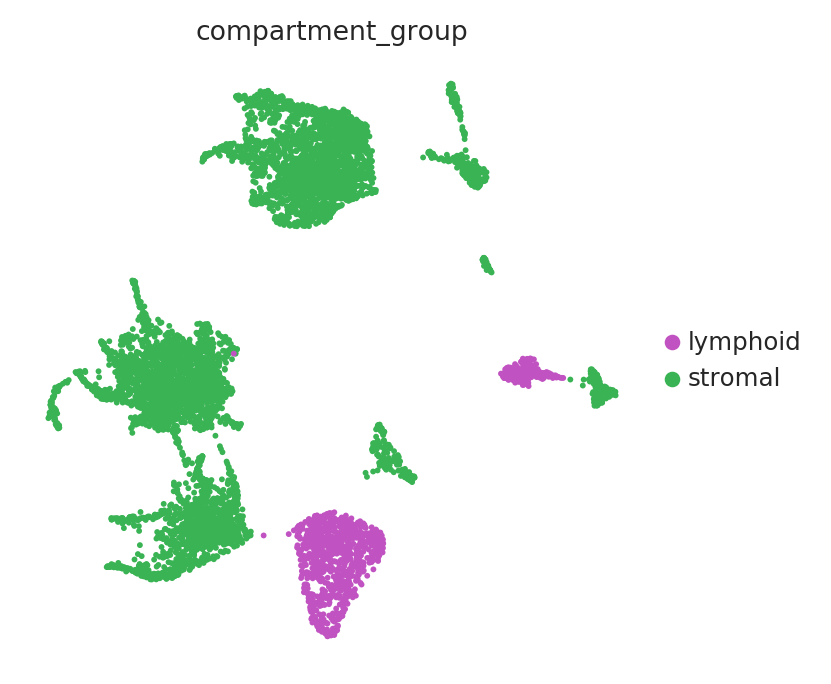

<Figure size 800x800 with 0 Axes>

In [16]:
# Pre-BBKNN UMAPs
preprocess.plot_umaps(adata)

## Do BBKNN, draw new umaps

In [17]:
preprocess.run_bbknn(adata)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


### Remove `adata.uns` palette colors because there is a bug

In [18]:
preprocess.remove_color_palettes(adata)

removing 'species_colors'
removing 'species_batch_colors'
removing 'sex_colors'
removing 'cell_ontology_class_colors'
removing 'narrow_group_colors'
removing 'broad_group_colors'
removing 'compartment_group_colors'


### Species

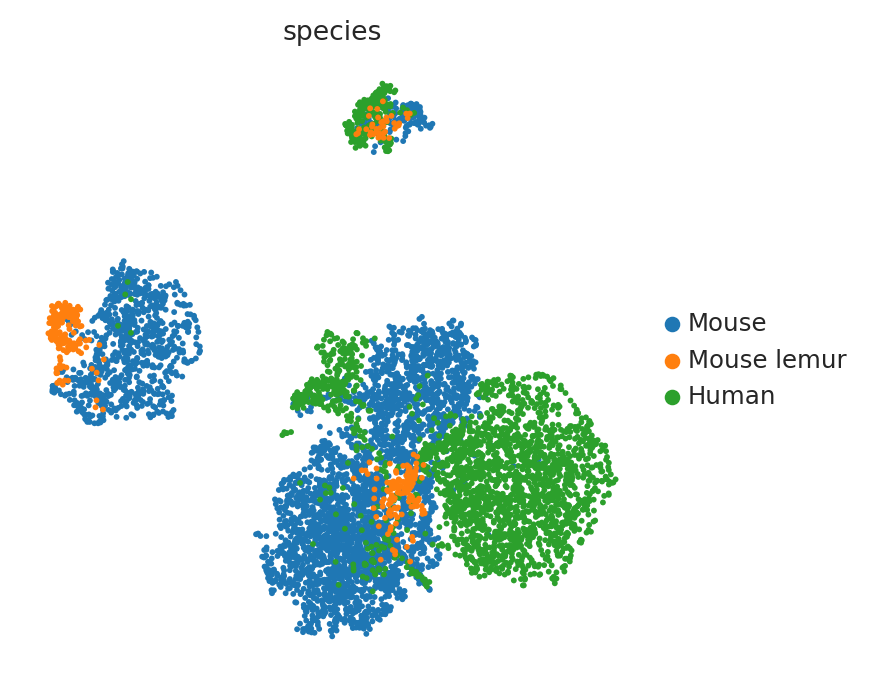

In [19]:
tab10 = sns.color_palette('tab10')
sc.pl.umap(adata, color='species', palette=tab10[:3], save='__species')

### Compartment group

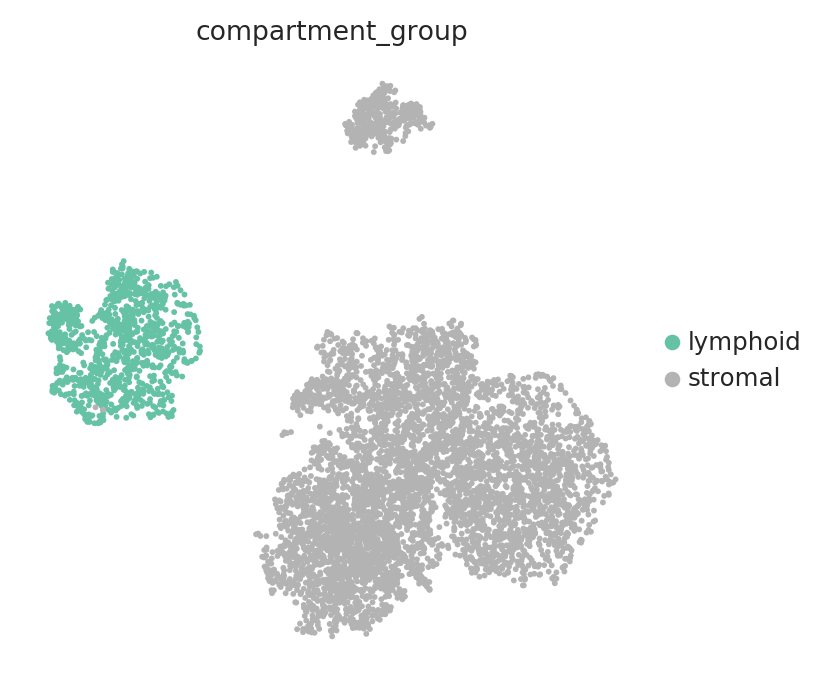

In [20]:
# there is some bug when the palette is pre-set
try:
    del adata.uns['compartment_group_colors']
except KeyError:
    pass

sc.pl.umap(adata, color='compartment_group', save='__compartment_group', palette='Set2')

### Narrow group

removing 'species_colors'
removing 'compartment_group_colors'


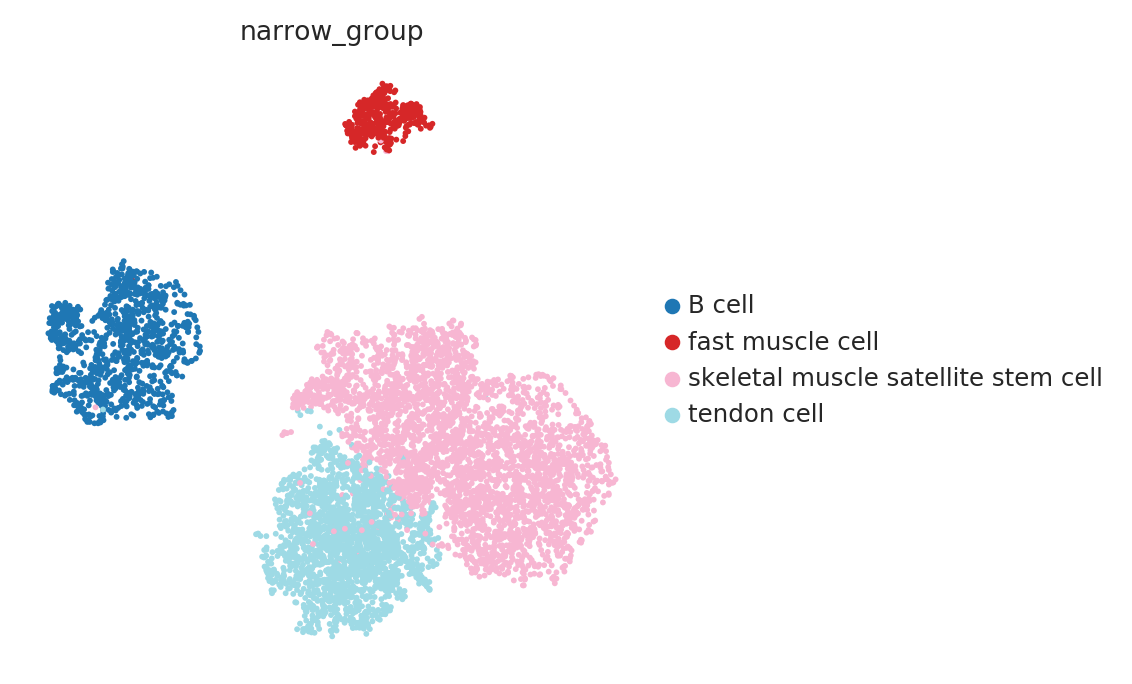

In [21]:
preprocess.remove_color_palettes(adata)
sc.pl.umap(adata, color='narrow_group', palette='tab20', save='__narrow_group')

In [22]:
preprocess.remove_color_palettes(adata)

removing 'narrow_group_colors'


... storing 'age' as categorical


Error plotting with colors=['species', 'species_batch', 'age', 'individual'], skipping


<Figure size 3864x800 with 0 Axes>

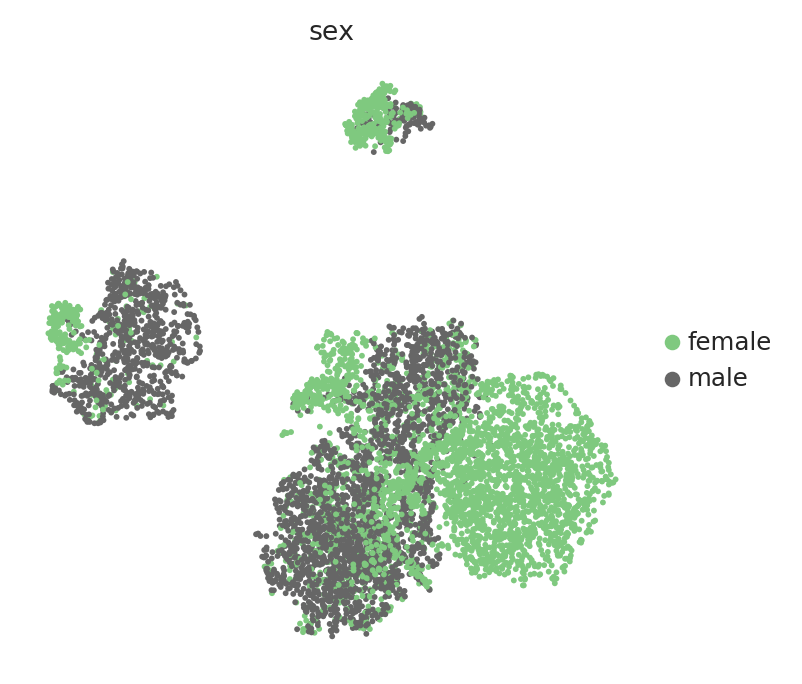

Error plotting with colors=['cell_ontology_class'], skipping


<Figure size 800x800 with 0 Axes>

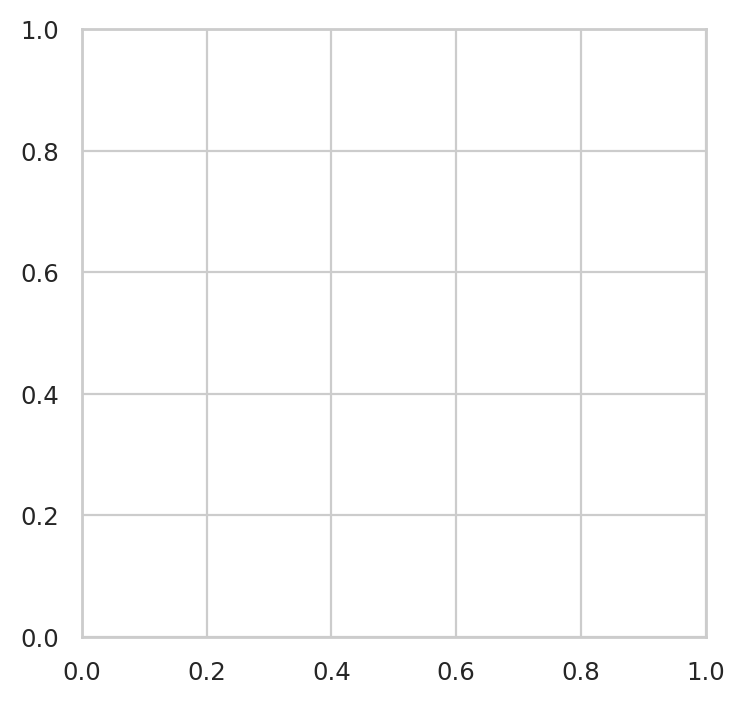

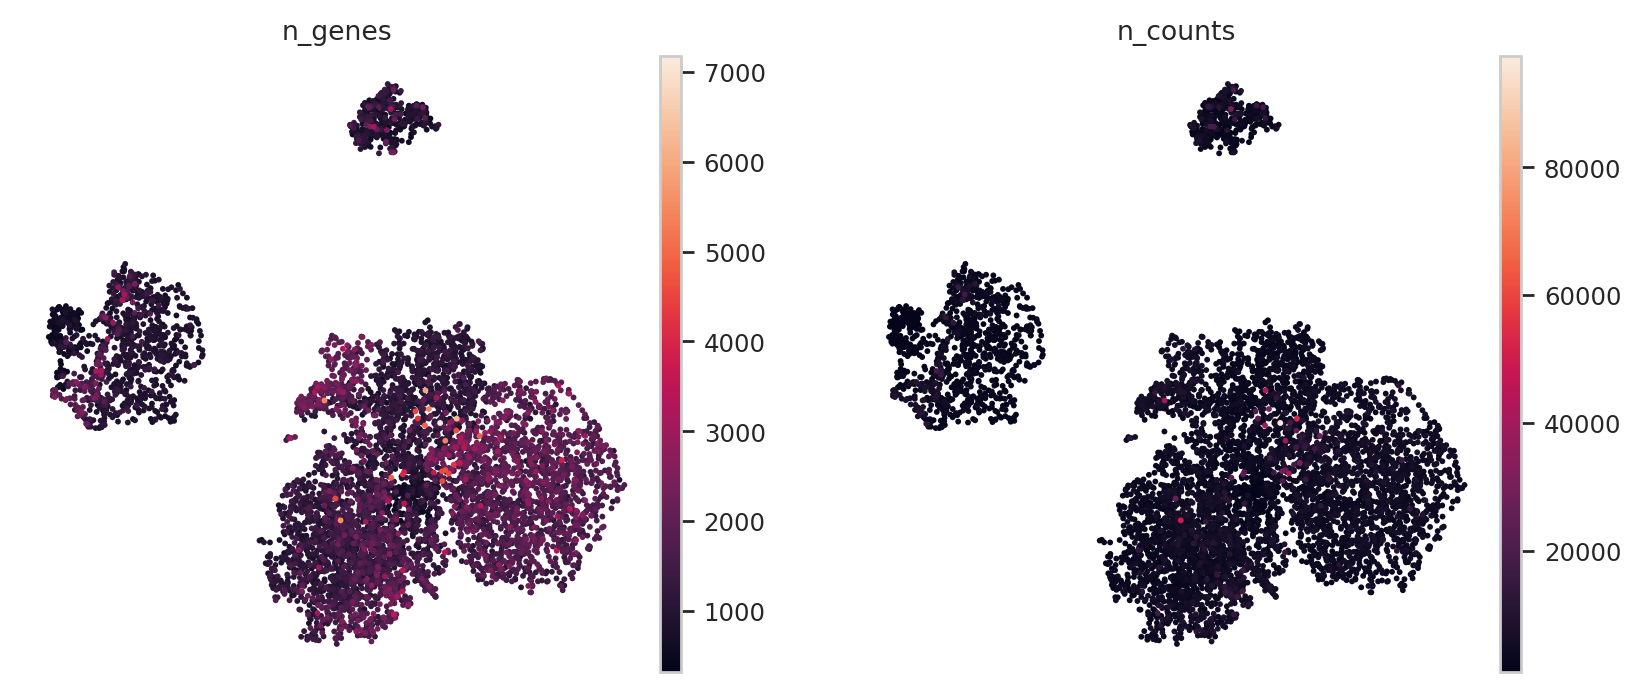

<Figure size 800x800 with 0 Axes>

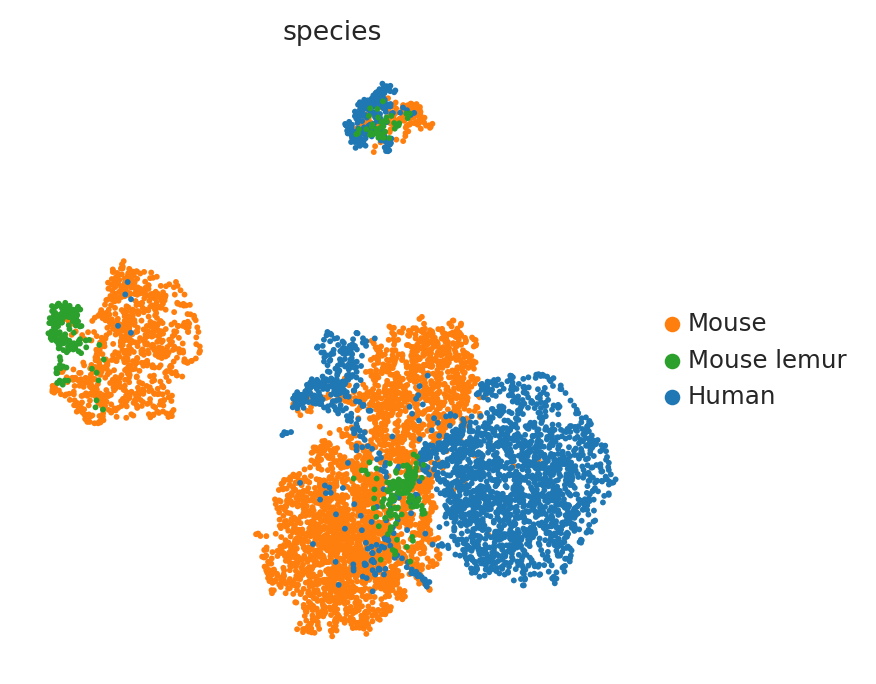

Error plotting with colors=['cell_ontology_class'], skipping
Error plotting with colors=['narrow_group', 'broad_group', 'compartment_group'], skipping
Error plotting with colors=narrow_group, skipping
Error plotting with colors=broad_group, skipping


<Figure size 800x800 with 0 Axes>

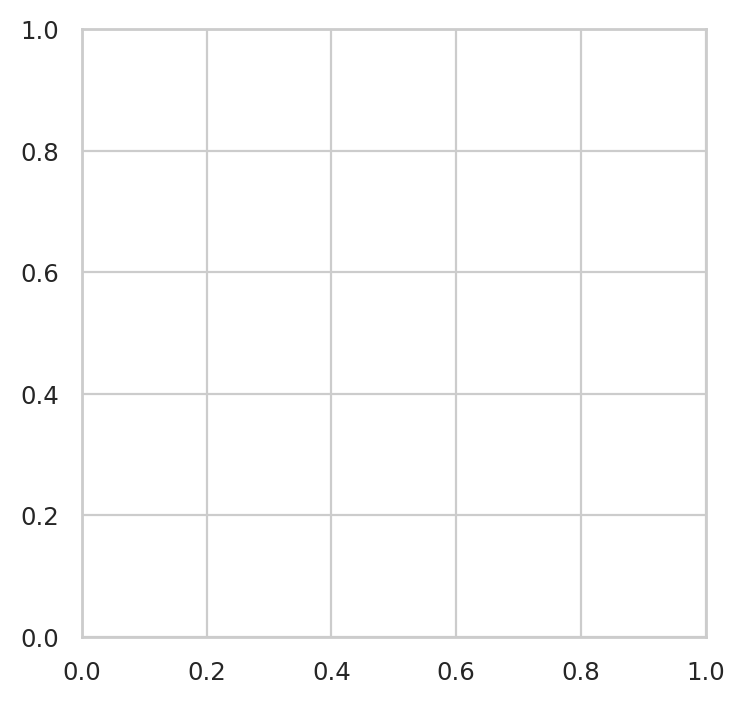

<Figure size 2898x800 with 0 Axes>

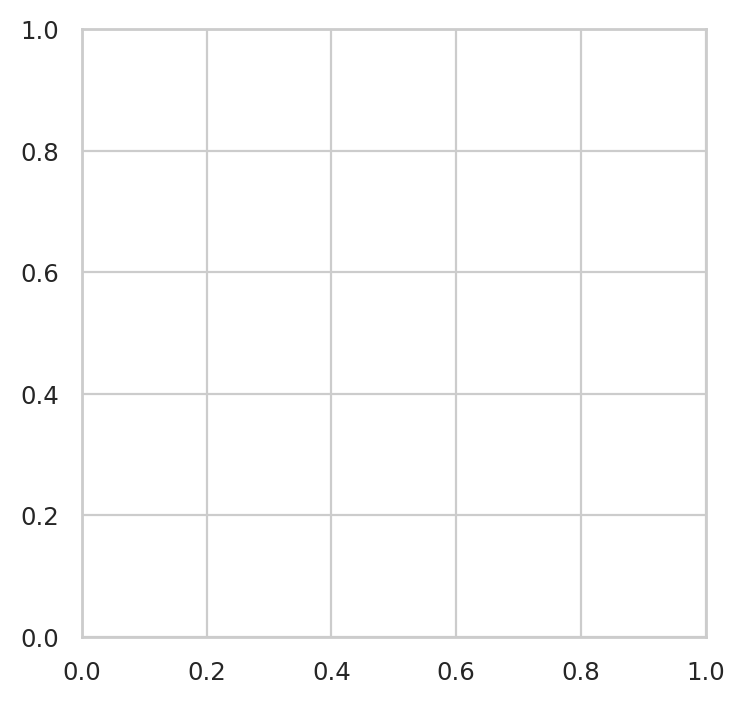

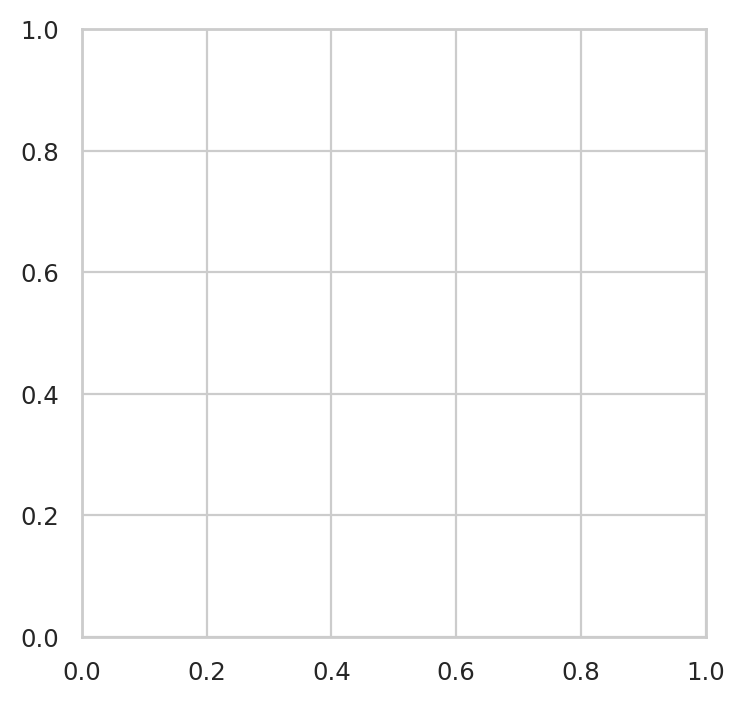

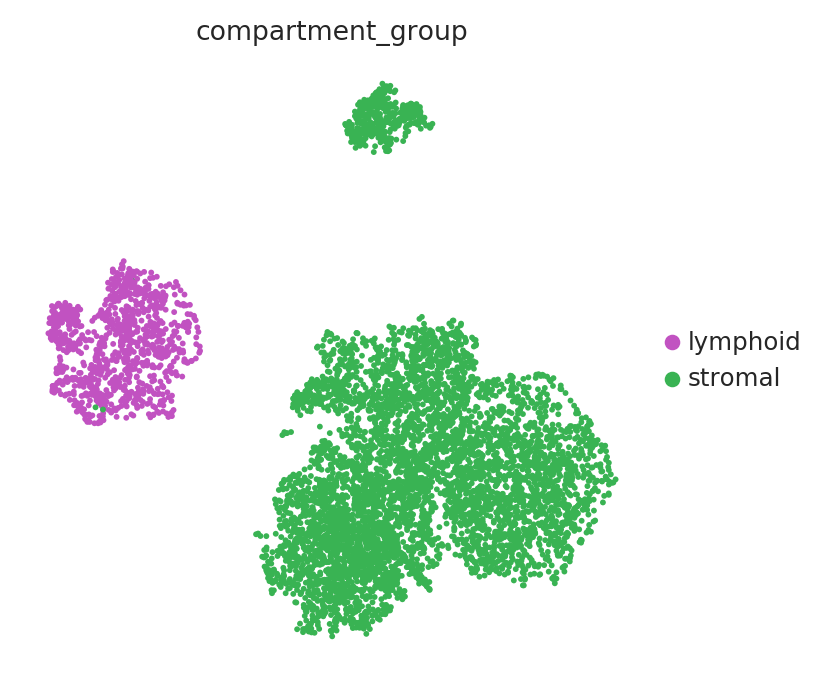

<Figure size 800x800 with 0 Axes>

In [23]:
# Post-BBKNN UMAPs 
adata.obs['age'] = adata.obs['age'].astype(str)
preprocess.plot_umaps(adata)

## Write output adata to file

In [26]:
# # Write BBKNN + UMAP data to file
adata.write(output_file)

In [30]:
output_file

'/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__muscle__preprocessed.h5ad'

In [27]:
adata

AnnData object with n_obs × n_vars = 6794 × 12879
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'disp

## Write narrow group names for correlations

In [28]:
' '.join([x.replace(' ',  '\\') for x in sorted(set(adata.obs['narrow_group']))])

'B\\cell fast\\muscle\\cell skeletal\\muscle\\satellite\\stem\\cell tendon\\cell'

In [29]:
adata.obs.groupby(['narrow_group', 'species']).size()

narrow_group                         species    
B cell                               Mouse           810
                                     Mouse lemur     181
                                     Human             5
fast muscle cell                     Mouse           144
                                     Mouse lemur      41
                                     Human           220
skeletal muscle satellite stem cell  Mouse          1161
                                     Mouse lemur      86
                                     Human          2121
tendon cell                          Mouse          1899
                                     Mouse lemur      50
                                     Human            76
dtype: int64

# Plot correlations

## Append path to import

In [ ]:
sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/')

import visualize_correlation as corr_viz

## Read YAML config

### make dictionary to copy for config

In [ ]:
{
    x: list(y)
    for x, y in adata.obs.groupby(["compartment_group"])
    .narrow_group.unique()
    .to_dict()
    .items()
}

In [ ]:
sorted(adata.obs.broad_group.unique())

In [ ]:
%%file muscle_config.yml

all_groups:
   {"compartment": [ 'lymphoid', 'stromal'],
    "narrow": ["B cell", 'T cell', 'mesenchymal cell', 'skeletal muscle cell', 'skeletal muscle satellite stem cell'],
    "broad": ["B cell", 'T cell', 'mesenchymal cell', 'skeletal muscle cell', 'skeletal muscle satellite stem cell']

}
compartment_narrow: {
    "lymphoid": ["B cell", 'T cell'],
    "stromal": ['mesenchymal cell', 'skeletal muscle cell', 'skeletal muscle satellite stem cell']}


In [ ]:
config_yaml_path = 'muscle_config.yml'


with open(config_yaml_path) as file:
    config = yaml.full_load(file)
    
groups = config["all_groups"].keys()
groups

## Read dataframes

In [ ]:
correl_dir = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/analyses/xi-correlation/muscle'
within_celltypes_filenames = glob.glob(os.path.join(correl_dir, 'xi__narrow_group__drop_if_either_zero*.parquet'))

dfs_within = defaultdict(list)
for filename in within_celltypes_filenames:
    for group in groups:
        if group in filename:
            # Skip macrophage because it was from old annotation
            if 'macrophage' in filename:
                continue
            df = pd.read_parquet(filename)
            df = df.rename(
                columns={group + "_group": "cell_ontology_class"})
            dfs_within[group].append(df)
            
len(dfs_within)

In [ ]:
groups

In [ ]:
dfs_within['narrow']

## Visualize correlation

### Sset output folder

In [ ]:
output_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/muscle/correlation'
! mkdir -p $output_folder

In [ ]:
pvalue_level_kws=dict(level3=1e-10, level2=1e-5, level1=1e-3)

for key, dictionary in config.items():
    print(f'key: {key}')
    if "all_groups" == key:
        continue
    if "significant" in key:
        continue
#         df = pd.concat(dfs_within["narrow"], ignore_index=True)
#         narrow_celltypes_significant = []
#         for key, value in config["significant_compartment_narrow"].items():
#             narrow_celltypes_significant.extend(value)
#         df = df[df['cell_ontology_class'].isin(
#             narrow_celltypes_significant)]
    else:
        df = pd.concat(dfs_within["narrow"], ignore_index=True)
    corr_viz.corr_diff_within(df, "Human", dictionary, pvalue_level_kws=pvalue_level_kws)
    corr_viz.corr_diff_within(df, "Mouse lemur", dictionary, pvalue_level_kws=pvalue_level_kws)

for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.set_size_inches(4, 3)
    sns.despine(fig=fig)
#     fig.tight_layout()
    fig.savefig(os.path.join(output_folder, "figure%d.png" % i))
    fig.savefig(os.path.join(output_folder, "figure%d.pdf" % i))